In [134]:
import numpy as np
import math
import matplotlib.pyplot as plt


def print_table(table):
    for i in range(len(table)):
        for j in range(len(table[i])):
            print(table[i][j], end='  ')
        print(' ')


def newton_coeff(x, y):
    # create divided difference table
    N = len(x)
    table = [[0.0 for _ in range(N)] for _ in range(N)]
    for i in range(N):
        table[i][0] = y[i]
    for i in range(1, N):
        for j in range(N - i):
            table[j][i] = ((table[j][i - 1] - table[j + 1][i - 1]) /
                           (x[j] - x[i + j]))
    return table

def eval(x_data, y_data, x_test):
    coeff = newton_coeff(x_data, y_data)
    # Evaluate the polynomial
    f_xi = []
    for idx, x in enumerate(x_test):
        val = 0
        for i in range(len(x_data)):
            mul = coeff[0][i]
            for j in range(i):
                mul *= (x - x_data[j])
            val += mul
        f_xi.append(val)
    return f_xi

class Point:
    def __init__(self, x, y):
        self.x = x
        self.y = y

def f(x): return 1/(1+x**2)

def chebyshev_nodes(num_points): 
    x = [] 
    for i in range(num_points):
        x.append(5 * math.cos( (2*i + 1) / (2*num_points +2) * math.pi))
    return x

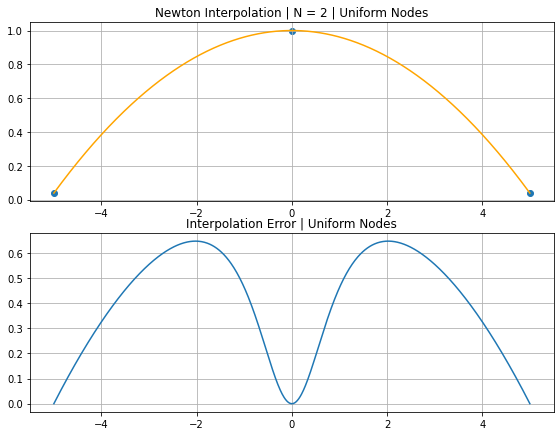

X = 5.0000, f(x) = 0.0385, p(x) = 0.0385
X = 1.6667, f(x) = 0.2647, p(x) = 0.8932
X = -1.6667, f(x) = 0.2647, p(x) = 0.8932
X = -5.0000, f(x) = 0.0385, p(x) = 0.0385


In [135]:
errors = {}

def plot_polynomial(N):
    # plot points
    x = list(np.linspace(-5, 5, N+1))
    y = [f(v) for v in x]
    
    fig, axs = plt.subplots(2,1, figsize=(8,6))
    fig.tight_layout()
    axs[0].grid()
    axs[0].set_title(f"Newton Interpolation | N = {N} | Uniform Nodes")
    axs[0].scatter(x, y, marker="o")

    # find the coeff of the polynomial
    x_fig = list(np.linspace(x[0], x[-1], 1000))
    f_xi = eval(x, y, x_fig)

    axs[0].plot(x_fig, f_xi, color='orange')

    # Plot error 
    axs[1].set_title("Interpolation Error | Uniform Nodes")
    axs[1].grid()
    axs[1].plot( x_fig, [ abs(f_xi[i] - f(x_fig[i])) for i in range(len(x_fig)) ] )
    
    plt.show()
    
    # Print values for 2N nodes 
    x_test = list(np.linspace(5, -5, 2*N))
    y_test = [ f(v) for v in x_test ]
    f_test = eval(x,y,x_test)
    
    for i in range(len(x_test)): 
        print(f'X = {x_test[i]:.4f}, f(x) = {y_test[i]:.4f}, p(x) = {f_test[i]:.4f}')
        
    # Get error at x = 1 + sqrt(10)
    ep = 1 + 10**0.5
    errors[N] = abs(f(ep) - eval(x,y,[ep])[0])
    
plot_polynomial(N=2)


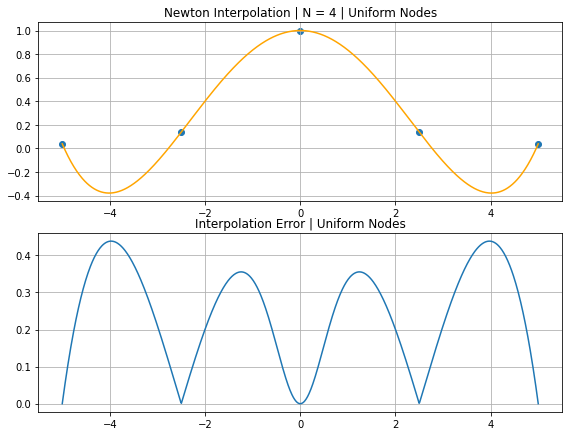

X = 5.0000, f(x) = 0.0385, p(x) = 0.0385
X = 3.5714, f(x) = 0.0727, p(x) = -0.3191
X = 2.1429, f(x) = 0.1788, p(x) = 0.3263
X = 0.7143, f(x) = 0.6622, p(x) = 0.9141
X = -0.7143, f(x) = 0.6622, p(x) = 0.9141
X = -2.1429, f(x) = 0.1788, p(x) = 0.3263
X = -3.5714, f(x) = 0.0727, p(x) = -0.3191
X = -5.0000, f(x) = 0.0385, p(x) = 0.0385


In [136]:
plot_polynomial(N=4)

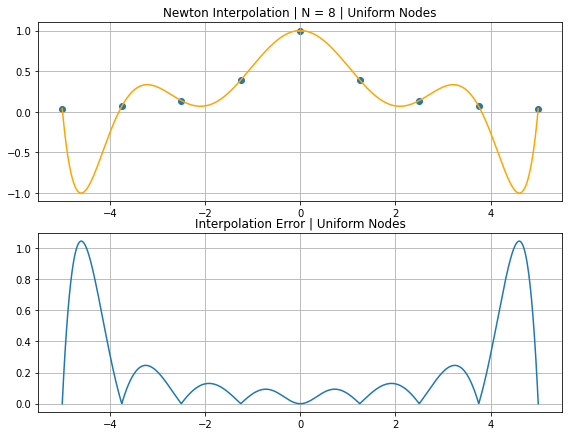

X = 5.0000, f(x) = 0.0385, p(x) = 0.0385
X = 4.3333, f(x) = 0.0506, p(x) = -0.7752
X = 3.6667, f(x) = 0.0692, p(x) = 0.1473
X = 3.0000, f(x) = 0.1000, p(x) = 0.3049
X = 2.3333, f(x) = 0.1552, p(x) = 0.0940
X = 1.6667, f(x) = 0.2647, p(x) = 0.1578
X = 1.0000, f(x) = 0.5000, p(x) = 0.5636
X = 0.3333, f(x) = 0.9000, p(x) = 0.9425
X = -0.3333, f(x) = 0.9000, p(x) = 0.9425
X = -1.0000, f(x) = 0.5000, p(x) = 0.5636
X = -1.6667, f(x) = 0.2647, p(x) = 0.1578
X = -2.3333, f(x) = 0.1552, p(x) = 0.0940
X = -3.0000, f(x) = 0.1000, p(x) = 0.3049
X = -3.6667, f(x) = 0.0692, p(x) = 0.1473
X = -4.3333, f(x) = 0.0506, p(x) = -0.7752
X = -5.0000, f(x) = 0.0385, p(x) = 0.0385


In [137]:
plot_polynomial(N=8)

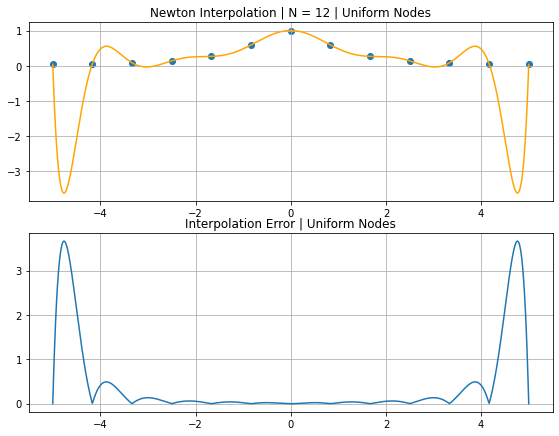

X = 5.0000, f(x) = 0.0385, p(x) = 0.0385
X = 4.5652, f(x) = 0.0458, p(x) = -2.6135
X = 4.1304, f(x) = 0.0554, p(x) = 0.1817
X = 3.6957, f(x) = 0.0682, p(x) = 0.4563
X = 3.2609, f(x) = 0.0860, p(x) = 0.0321
X = 2.8261, f(x) = 0.1113, p(x) = 0.0024
X = 2.3913, f(x) = 0.1488, p(x) = 0.1790
X = 1.9565, f(x) = 0.2071, p(x) = 0.2563
X = 1.5217, f(x) = 0.3016, p(x) = 0.2786
X = 1.0870, f(x) = 0.4584, p(x) = 0.4280
X = 0.6522, f(x) = 0.7016, p(x) = 0.7198
X = 0.2174, f(x) = 0.9549, p(x) = 0.9637
X = -0.2174, f(x) = 0.9549, p(x) = 0.9637
X = -0.6522, f(x) = 0.7016, p(x) = 0.7198
X = -1.0870, f(x) = 0.4584, p(x) = 0.4280
X = -1.5217, f(x) = 0.3016, p(x) = 0.2786
X = -1.9565, f(x) = 0.2071, p(x) = 0.2563
X = -2.3913, f(x) = 0.1488, p(x) = 0.1790
X = -2.8261, f(x) = 0.1113, p(x) = 0.0024
X = -3.2609, f(x) = 0.0860, p(x) = 0.0321
X = -3.6957, f(x) = 0.0682, p(x) = 0.4563
X = -4.1304, f(x) = 0.0554, p(x) = 0.1817
X = -4.5652, f(x) = 0.0458, p(x) = -2.6135
X = -5.0000, f(x) = 0.0385, p(x) = 0.0385


In [138]:
plot_polynomial(N=12)

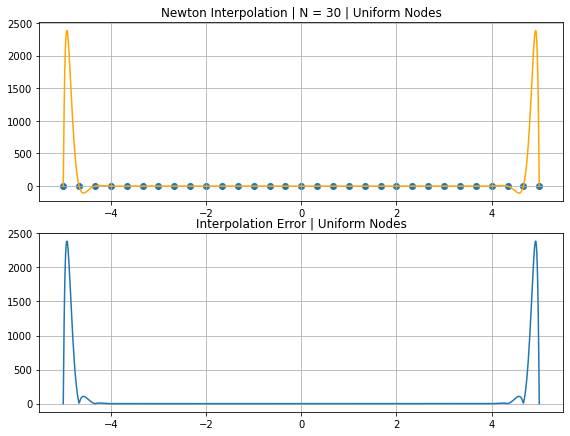

X = 5.0000, f(x) = 0.0385, p(x) = 0.0385
X = 4.8305, f(x) = 0.0411, p(x) = 1385.3037
X = 4.6610, f(x) = 0.0440, p(x) = -15.3831
X = 4.4915, f(x) = 0.0472, p(x) = -72.1311
X = 4.3220, f(x) = 0.0508, p(x) = 2.2545
X = 4.1525, f(x) = 0.0548, p(x) = 6.6329
X = 3.9831, f(x) = 0.0593, p(x) = -0.3123
X = 3.8136, f(x) = 0.0643, p(x) = -0.8140
X = 3.6441, f(x) = 0.0700, p(x) = 0.1479
X = 3.4746, f(x) = 0.0765, p(x) = 0.2343
X = 3.3051, f(x) = 0.0839, p(x) = 0.0638
X = 3.1356, f(x) = 0.0923, p(x) = 0.0561
X = 2.9661, f(x) = 0.1021, p(x) = 0.1083
X = 2.7966, f(x) = 0.1134, p(x) = 0.1237
X = 2.6271, f(x) = 0.1266, p(x) = 0.1242
X = 2.4576, f(x) = 0.1420, p(x) = 0.1385
X = 2.2881, f(x) = 0.1604, p(x) = 0.1614
X = 2.1186, f(x) = 0.1822, p(x) = 0.1837
X = 1.9492, f(x) = 0.2084, p(x) = 0.2079
X = 1.7797, f(x) = 0.2400, p(x) = 0.2393
X = 1.6102, f(x) = 0.2783, p(x) = 0.2786
X = 1.4407, f(x) = 0.3251, p(x) = 0.3255
X = 1.2712, f(x) = 0.3823, p(x) = 0.3821
X = 1.1017, f(x) = 0.4517, p(x) = 0.4515
X = 0.9

In [139]:
plot_polynomial(N=30)

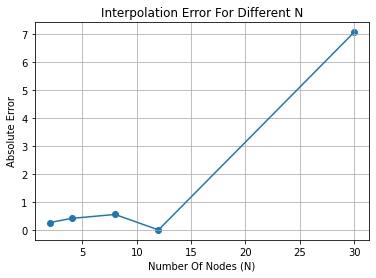

In [140]:
# Plot error
plt.scatter(errors.keys(), errors.values())
plt.plot(errors.keys(), errors.values())
plt.grid()
plt.title("Interpolation Error For Different N")
plt.xlabel("Number Of Nodes (N)")
plt.ylabel("Absolute Error")
plt.show()


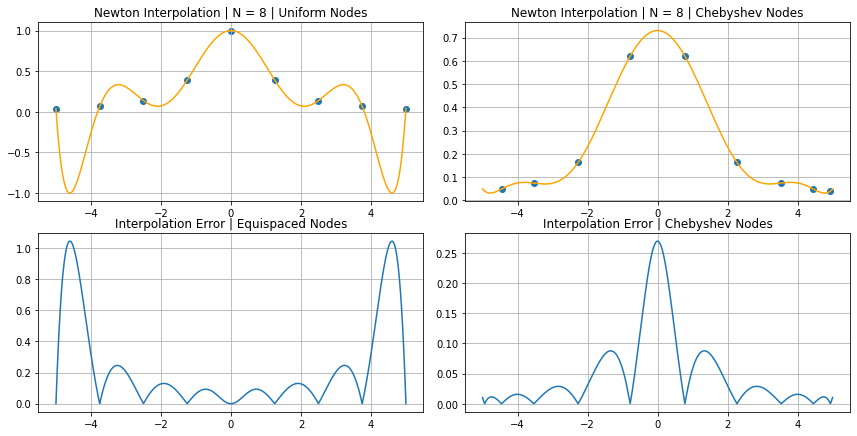

Text(0.5, 0.98, 'Equi-spaced nodes and Chebyshev Nodes ')

In [141]:
N = 8
# Generate Chebyshev nodes
c_x = chebyshev_nodes(N+1)
c_y = [ f(v) for v in c_x ]

c_test = chebyshev_nodes(1000)
c_f = eval(c_x, c_y, c_test)


fig, axs = plt.subplots(2,2, figsize=(12,6))
fig.tight_layout()
axs[0][1].grid()
axs[0][1].set_title(f"Newton Interpolation | N = {N} | Chebyshev Nodes")
axs[0][1].scatter(c_x, c_y, marker="o")
axs[0][1].plot(c_test, c_f, color='orange')

chebyshev_error =  [ abs(c_f[i] - f(c_test[i])) for i in range(len(x_test)) ]
axs[1][1].set_title("Interpolation Error | Chebyshev Nodes")
axs[1][1].grid()
axs[1][1].plot( c_test, chebyshev_error)

x = list(np.linspace(-5, 5, N+1))
y = [f(v) for v in x]

axs[0][0].grid()
axs[0][0].set_title(f"Newton Interpolation | N = {N} | Uniform Nodes")
axs[0][0].scatter(x, y, marker="o")

x_test = list(np.linspace(x[0], x[-1], 1000))
f_xi = eval(x, y, x_test)

axs[0][0].plot(x_test, f_xi, color='orange')

equi_error = [ abs(f_xi[i] - f(x_test[i])) for i in range(len(x_test)) ]

# Plot error 
axs[1][0].set_title("Interpolation Error | Equispaced Nodes")
axs[1][0].grid()
axs[1][0].plot( x_test, equi_error )

plt.show()
fig.suptitle(f'Equi-spaced nodes and Chebyshev Nodes ')

In [150]:
import statistics as s

print('\n==== AVERAGE ERROR ====')
print(f"Chebyshev Nodes: {s.mean(chebyshev_error):.4f}")
print(f"Equispaced Nodes: {s.mean(equi_error):.4f}")
print('\n==== MAX ERRORS ====')
print(f"Chebyshev Nodes: {max(chebyshev_error):.4f}")
print(f"Equispaced Nodes: {max(equi_error):.4f}")
print('\n==== STD DEV ERRORS ====')
print(f"Chebyshev Nodes: {s.stdev(chebyshev_error):.4f}")
print(f"Equispaced Nodes: {s.stdev(equi_error):.4f}")


==== AVERAGE ERROR ====
Chebyshev Nodes: 0.0340
Equispaced Nodes: 0.2284

==== MAX ERRORS ====
Chebyshev Nodes: 0.2692
Equispaced Nodes: 1.0452

==== STD DEV ERRORS ====
Chebyshev Nodes: 0.0536
Equispaced Nodes: 0.2890
